In [99]:
import warnings
warnings.filterwarnings('ignore')


In [100]:
# Importing libraries for computation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
# Read the dataset

car=pd.read_csv(r'C:\Users\sriram.kannan\Desktop\PGP-AIML\Residency4\Lab\cars-dataset.csv')
car

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


In [102]:
car.shape

(398, 8)

In [103]:
# Question 1) EDA

# Check for missing values

print(car[car.isnull().any(axis=1)])

# No null values

Empty DataFrame
Columns: [car name, cyl, disp, hp, wt, acc, yr, mpg]
Index: []


In [104]:
car.describe().transpose() 

car.dtypes

# We infer from both that hp is missing as it's non-numeric in datatype

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [105]:
# Finding non-numeric in numeric columns

# hp column is in concern as it belongs to an object datatype
# For column hp
nonum = pd.DataFrame(car.hp.str.isdigit()) 
nonum[nonum['hp'] == False]

# We infer six non-numeric entries in hp



,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [106]:
# Replace the entries with null



car = car.replace('?', np.nan)



In [107]:
car['hp']=car['hp'].astype('float64')
car

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198.0,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220.0,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215.0,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225.0,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190.0,3850,8.5,70,15.0


In [108]:
# check for data type and column information

car.info()

# there're six null values in hp
# other columns do not have null values
# Missing value imputation for hp column withh median

num_cols = car.drop('car name', axis=1)
num_cols = num_cols.apply(lambda x: x.fillna(x.median()),axis=0)

# Joining Non-numeric column Car name with the original
car_name = pd.DataFrame(car[['car name']])
car = num_cols.join(car_name)

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
car name    398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [109]:
car[car.isnull().any(axis=1)]

# Exploratory data analysis is complete with the missing and incorrect values imputation for the concerned column.

,cyl,disp,hp,wt,acc,yr,mpg,car name


In [110]:
# Identify correlation among variables between dependent 'mpg' and other variables

car.corr()

# Inference - mpg is very higly correlated with cyl, disp, hp and wt. correlated with acc and yr significantly as well.

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.804203
hp,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.773453
wt,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,1.000000


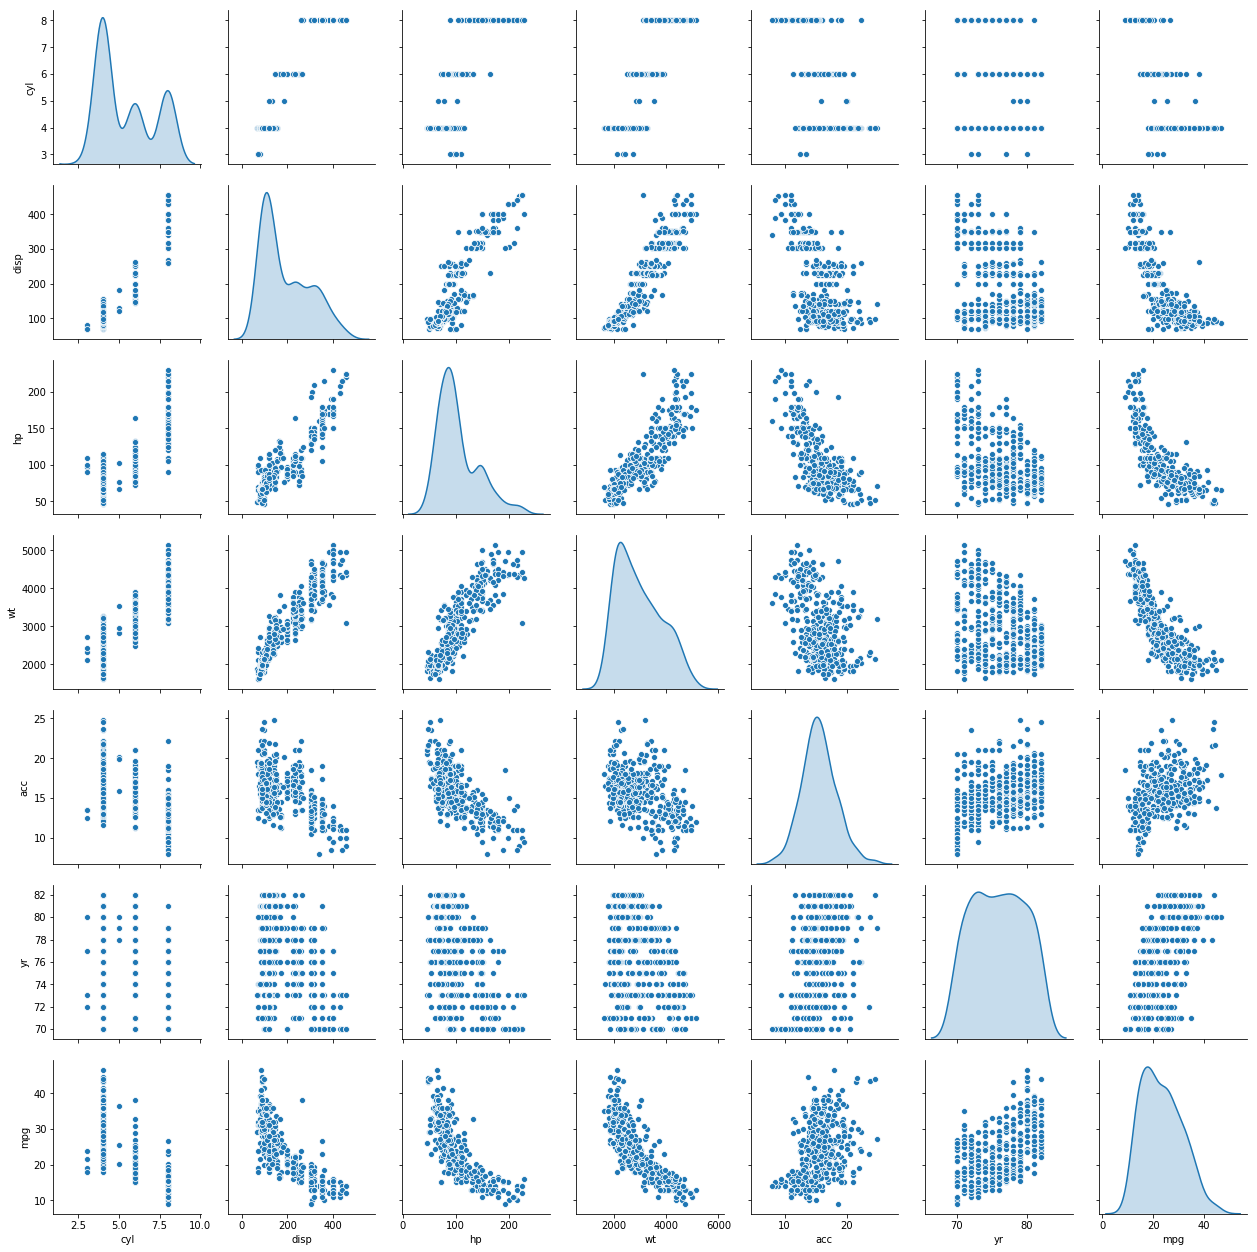

In [111]:
# Question 2) Use pair plot or scatter matrix to visualize how the different variables are related 

car_att = car.iloc[:, 0:7]

sns.pairplot(car_att, diag_kind='kde')   # to plot density curve instead of histogram


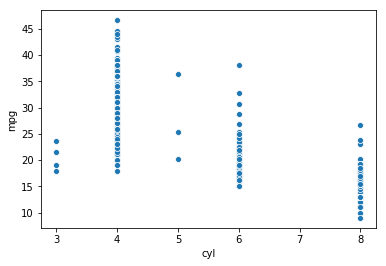

In [112]:
# Visualize the scatter plot between mpg and other columns
# Using visualisation, different clusters among the variables can be viewed easily


# 1) Between Cyl and mpg
sns.scatterplot(x='cyl', y='mpg',data=car, palette='spring')

# Inference - given data is closely associated with five clusters for the values of 3,4,5,6,8 cylinders

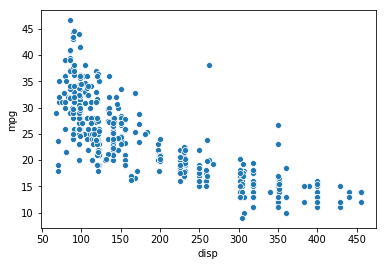

In [43]:
# 2) Between disp and mpg
sns.scatterplot(x='disp', y='mpg',data=car, palette='spring')

# Inference - most of data is more densily concentrated between 50 and 200, other values of displacement show unequal densities
# Strong correlation can be observed between disp and mpg

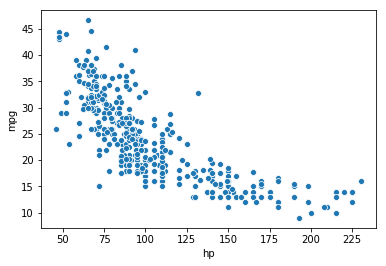

In [44]:
# 3) Between hp and mpg
sns.scatterplot(x='hp', y='mpg',data=car, palette='spring')

# Inference - most of data is more densily concentrated between 60 and 110, other values of hp show unequal densities
# Strong correlation can be observed between hp and mpg

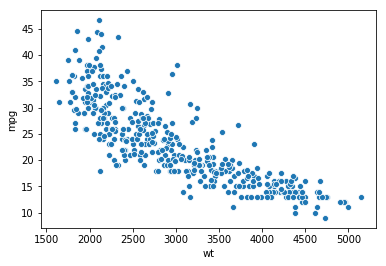

In [45]:
# 4) Between wt and mpg
sns.scatterplot(x='wt', y='mpg',data=car, palette='spring')

# Inference - data is widely concentrated between 1750 and 4500
# Strong correlation can be observed between wt and mpg

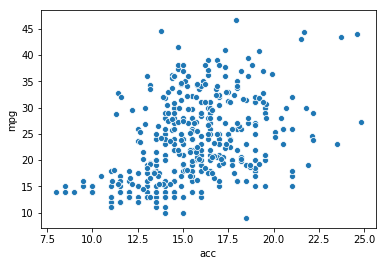

In [46]:
# 5) Between acc and mpg
sns.scatterplot(x='acc', y='mpg',data=car, palette='spring')

# Inference - data is densily concentrated between 12.5 and 18 values of acc

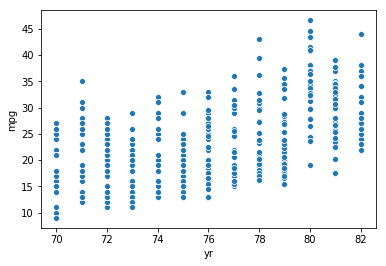

In [47]:
# 5) Between yr and mpg
sns.scatterplot(x='yr', y='mpg',data=car, palette='spring')

# Inference - As can be seen, values are clustered between 70 and 82

In [113]:
# Question 3

# Building the Clustering model to identfy the optimum clusters
# K-means clustering is one such technique to identfy the same
# Data is standardized before the clustering technique is applied

from scipy.stats import zscore
car1= car.drop(columns=['car name'])
carz = car1.apply(zscore)

# K-means

from sklearn.cluster import KMeans
k_val=range(1,10);
a=[]
error=[]
k_cluster_Centers=[]


for i in k_val:
    km = KMeans(n_clusters=i, n_init=10, max_iter=300)
    #Fit on the data
    km.fit(carz)
    a.append(i)
    error.append(km.inertia_)
    k_cluster_Centers.append(km.cluster_centers_)




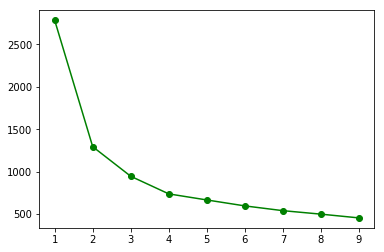

In [114]:
# Plot the Elbow plot to determine the optimum clusters
plt.plot(range(1,10), error, 'go-')


In [116]:
# From the plot, we infer that the SSE (error - sum of squared errors) value starts to form a pattern between 3 and 4
# Therefore, the optimal value of K would be 4

In [137]:
# Identify and Separate the clusters on the given data

cluster = KMeans( n_clusters = 4, random_state = 2354 )
cluster.fit(carz)
prediction=cluster.predict(carz)
carz['Group'] = prediction
carz

# Clusters are saved as a separate column to identify the patterm among variables
# Column Group contains four cluster values from 0 to 3

,cyl,disp,hp,wt,acc,yr,mpg,Group
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,0
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,0
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,0
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,0
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,0
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.627426,-1.090751,0
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.627426,-1.218855,0
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.627426,-1.218855,0
8,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.627426,-1.218855,0
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.627426,-1.090751,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015C1B320FD0>,
      dtype=object)

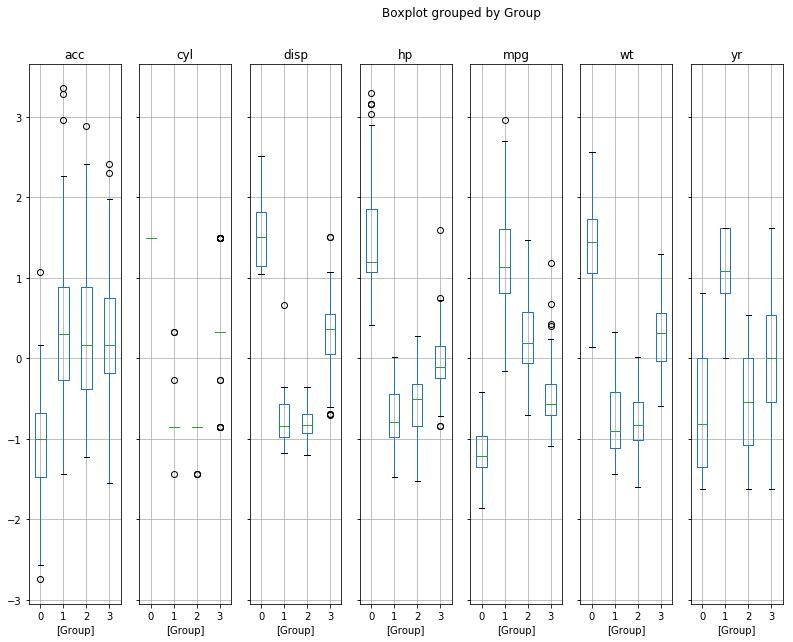

In [138]:
carz.boxplot(by = 'Group', layout=(1,8), figsize=(15, 10))

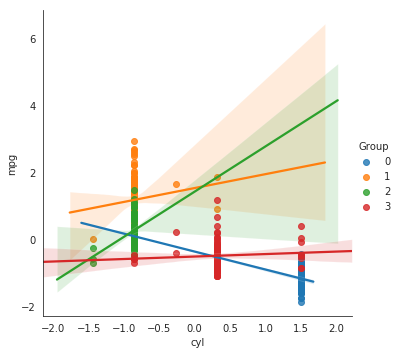

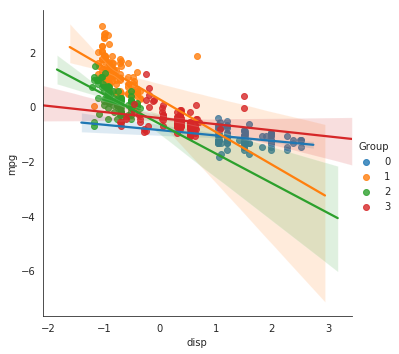

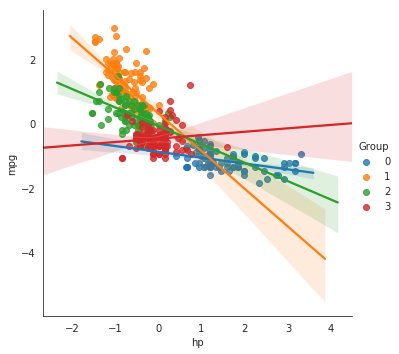

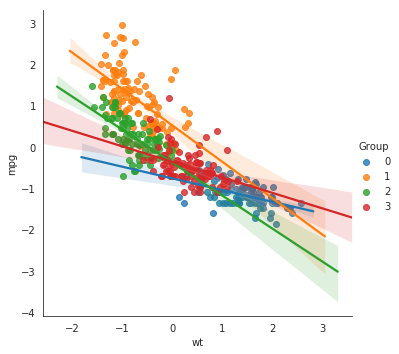

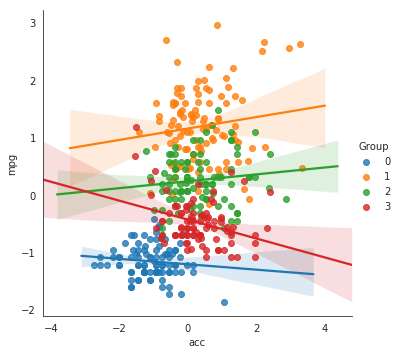

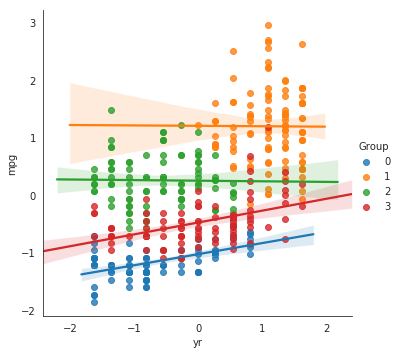

In [139]:
# Observe the clusters between mpg and other variables

var=list(car.drop(columns=['car name', 'mpg']))


for i in var:
    with sns.axes_style("white"):
        plot = sns.lmplot(i,'mpg',data=carz,hue='Group')
        


In [148]:
# Question 4

# Building Linear regression models on each cluster separately and print the coefficients


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1) For cluster 0
car0= carz[carz['Group']==0]

X= car0.drop(columns =['Group','mpg'])
Y=car0['mpg']

## Splitting into 80:20 ratio for training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## Size of Training & Test sets of X frame
print (X_train.shape, X_test.shape);

## Size of Training & Test sets of Y frame
print (Y_train.shape, Y_test.shape);

## Model

lr = LinearRegression()
lr.fit(X_train, Y_train)

## Finding the coefficients of each feature
  
coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
print (coeff)

# Intercept
print ("Y Intercept is", lr.intercept_);

# Accuracy of the model
## Predicting Y for the test dataset

Y_pred= lr.predict(X_test);

## predict Y for the training dataset

Y_predt= lr.predict(X_train);

## Accuracy Score for the model

from sklearn.metrics import accuracy_score;
accuracy_Score_training = lr.score(X_train, Y_train);
accuracy_Score_test = lr.score(X_test,Y_test);
print ("Accuracy in percent of training set for cluster 0",accuracy_Score_training*100);
print ("Accuracy in percent of test set for cluster 0",accuracy_Score_test*100);

(66, 6) (29, 6)
(66,) (29,)
      Coefficient
cyl      0.327602
disp     0.027584
hp      -0.158175
wt      -0.166741
acc     -0.152877
yr       0.164175
Y Intercept is -1.261156703750028
Accuracy in percent of training set for cluster 0 62.26932769752425
Accuracy in percent of test set for cluster 0 39.06462524522814


In [147]:
# Building Linear regression models on each cluster separately and print the coefficients


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1) For cluster 1
car0= carz[carz['Group']==1]

X= car0.drop(columns =['mpg','Group'])
Y=car0['mpg']

## Splitting into 80:20 ratio for training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## Size of Training & Test sets of X frame
print (X_train.shape, X_test.shape);

## Size of Training & Test sets of Y frame
print (Y_train.shape, Y_test.shape);

## Model

lr = LinearRegression()
lr.fit(X_train, Y_train)

## Finding the coefficients of each feature
  
coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
print (coeff)

# Intercept
print ("Y Intercept is", lr.intercept_);

# Accuracy of the model
## Predicting Y for the test dataset

Y_pred= lr.predict(X_test);

## predict Y for the training dataset

Y_predt= lr.predict(X_train);

## Accuracy Score for the model

from sklearn.metrics import accuracy_score;
accuracy_Score_training = lr.score(X_train, Y_train);
accuracy_Score_test = lr.score(X_test,Y_test);
print ("Accuracy in percent of training set for cluster 1",accuracy_Score_training*100);
print ("Accuracy in percent of test set for cluster 1",accuracy_Score_test*100);

(77, 6) (33, 6)
(77,) (33,)
      Coefficient
cyl      0.857190
disp     0.150451
hp      -0.296755
wt      -1.068052
acc      0.139169
yr       0.389720
Y Intercept is 0.48085611401708217
Accuracy in percent of training set for cluster 1 58.58628605030892
Accuracy in percent of test set for cluster 1 48.51453155098726


In [146]:
# Building Linear regression models on each cluster separately and print the coefficients


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1) For cluster 2
car0= carz[carz['Group']==2]

X= car0.drop(columns =['mpg','Group'])
Y=car0['mpg']

## Splitting into 80:20 ratio for training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## Size of Training & Test sets of X frame
print (X_train.shape, X_test.shape);

## Size of Training & Test sets of Y frame
print (Y_train.shape, Y_test.shape);

## Model

lr = LinearRegression()
lr.fit(X_train, Y_train)

## Finding the coefficients of each feature
  
coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
print (coeff)

# Intercept
print ("Y Intercept is", lr.intercept_);

# Accuracy of the model
## Predicting Y for the test dataset

Y_pred= lr.predict(X_test);

## predict Y for the training dataset

Y_predt= lr.predict(X_train);

## Accuracy Score for the model

from sklearn.metrics import accuracy_score;
accuracy_Score_training = lr.score(X_train, Y_train);
accuracy_Score_test = lr.score(X_test,Y_test);
print ("Accuracy in percent of training set for cluster 2",accuracy_Score_training*100);
print ("Accuracy in percent of test set for cluster 2",accuracy_Score_test*100);

(67, 6) (30, 6)
(67,) (30,)
      Coefficient
cyl      1.841228
disp    -0.661140
hp      -0.061891
wt      -0.603900
acc     -0.058128
yr       0.107097
Y Intercept is 0.9020862595402783
Accuracy in percent of training set for cluster 2 63.663487892146556
Accuracy in percent of test set for cluster 2 53.87250642200465


In [145]:
# Question 4

# Building Linear regression models on each cluster separately and print the coefficients


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1) For cluster 3
car0= carz[carz['Group']==3]

X= car0.drop(columns =['mpg','Group'])
Y=car0['mpg']

## Splitting into 80:20 ratio for training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## Size of Training & Test sets of X frame
print (X_train.shape, X_test.shape);

## Size of Training & Test sets of Y frame
print (Y_train.shape, Y_test.shape);

## Model

lr = LinearRegression()
lr.fit(X_train, Y_train)

## Finding the coefficients of each feature
  
coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
print (coeff)

# Intercept
print ("Y Intercept is", lr.intercept_);

# Accuracy of the model
## Predicting Y for the test dataset

Y_pred= lr.predict(X_test);

## predict Y for the training dataset

Y_predt= lr.predict(X_train);

## Accuracy Score for the model

from sklearn.metrics import accuracy_score;
accuracy_Score_training = lr.score(X_train, Y_train);
accuracy_Score_test = lr.score(X_test,Y_test);
print ("Accuracy in percent of training set for cluster 3",accuracy_Score_training*100);
print ("Accuracy in percent of test set for cluster 3",accuracy_Score_test*100);

(67, 6) (29, 6)
(67,) (29,)
      Coefficient
cyl      0.220508
disp    -0.086796
hp      -0.070762
wt      -0.438433
acc     -0.083398
yr       0.216510
Y Intercept is -0.3897007869859551
Accuracy in percent of training set for cluster 3 50.30055621489207
Accuracy in percent of test set for cluster 3 37.813873764018325
